## Previsão de cancelamento de conta em e-commerce (churn) a fim de realizar ações preventivas
 - Projeto de Disciplina - Redes neurais com TensorFlow [25E3_2]
 - Aluna: Rosana Ribeiro Lima
 - Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

------
### Pitch de negócio

##### Problema:

Com frequência, diversas empresas perdem receitas por cancelamento de clientes insatisfeitos, sejam empresas de telecomunicações, de streaming, bancos, e-commerce, entre outras. Sabe-se que o custo da aquisição de um novo cliente é maior do que o custo de manutenção dos clientes atuais (ações de marketing, campanhas, ações promocionais, etc). Mas muitas vezes, esse acompanhamento e monitoramento da saúde do relacionamento com o cliente é algo difícil.

Seria útil para as empresas se elas pudessem saber previamente quais clientes estão mais propensos ao cancelamento de um serviço, para que assim possam realizar ações preventivas mais direcionadas a esse cliente.

##### Solução proposta:
A solução proposta por este trabalho visa analisar o dataset em questão e utilizá-lo como base para criar um modelo de redes neurais que permita identificar a probabilidade de cancelamento do serviço (churn) pelo cliente, com base em dados fornecidos pela empresa. A ideia e o objetivo é treinar um modelo sensível aos clientes com tendência ao cancelamento (construir um modelo com alto recall) para então fornecer a inferência de dados por meio de uma API que a empresa possa consultar sempre que desejado (por exemplo, uma vez ao mês). Assim, sempre que a API retornar que o cliente tem alta chance de cancelamento, a empresa poderá tomar as ações que julgar necessárias para tentar evitar tal cancelamento, como o fornecimento de cupons, a entrega de brindes, o fornecimento de serviços ou benefícios adicionais, o contato para colheita de feedbacks, entre outros. 



In [279]:
import os
import pandas as pd
import numpy as np

path = "../data/"

arquivo_xlsx = 'ECommerceDataset.xlsx'

df = pd.read_excel(os.path.join(path, arquivo_xlsx), sheet_name='E Comm')

df.to_csv(os.path.join(path,'ecommerce-churn.csv'), index=False)

df.head(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [280]:
df.shape

(5630, 20)

In [281]:
df.info() # aqui, verificamos que há alguns dados nulos a serem tratados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [282]:
# Remover dados nulos
df = df.dropna() 

# Remover duplicatas
df = df.drop_duplicates(subset='CustomerID', keep='first') # limpar duplicatas, se houver
df.shape


(3774, 20)

In [283]:
df = df.drop(['CustomerID'], axis=1)
df.columns


Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [284]:
print(df['PreferredLoginDevice'].value_counts())
print('-------------')
print(df['PreferredPaymentMode'].value_counts())
print('-------------')
print(df['Gender'].value_counts())
print('-------------')
print(df['PreferedOrderCat'].value_counts())
print('-------------')
print(df['MaritalStatus'].value_counts())


PreferredLoginDevice
Mobile Phone    1936
Computer        1111
Phone            727
Name: count, dtype: int64
-------------
PreferredPaymentMode
Debit Card          1538
Credit Card         1124
E wallet             443
COD                  301
UPI                  285
Cash on Delivery      48
CC                    35
Name: count, dtype: int64
-------------
Gender
Male      2271
Female    1503
Name: count, dtype: int64
-------------
PreferedOrderCat
Laptop & Accessory    1961
Mobile Phone          1227
Fashion                443
Mobile                 119
Others                  18
Grocery                  6
Name: count, dtype: int64
-------------
MaritalStatus
Married     1982
Single      1245
Divorced     547
Name: count, dtype: int64


In [285]:
colunas_categoricas = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat','MaritalStatus']
df = pd.get_dummies(df, columns=colunas_categoricas, drop_first=False, dtype=int)


df.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [286]:
df.shape

(3774, 35)

In [287]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  3774 non-null   int64  
 1   Tenure                                 3774 non-null   float64
 2   CityTier                               3774 non-null   int64  
 3   WarehouseToHome                        3774 non-null   float64
 4   HourSpendOnApp                         3774 non-null   float64
 5   NumberOfDeviceRegistered               3774 non-null   int64  
 6   SatisfactionScore                      3774 non-null   int64  
 7   NumberOfAddress                        3774 non-null   int64  
 8   Complain                               3774 non-null   int64  
 9   OrderAmountHikeFromlastYear            3774 non-null   float64
 10  CouponUsed                             3774 non-null   float64
 11  OrderCoun

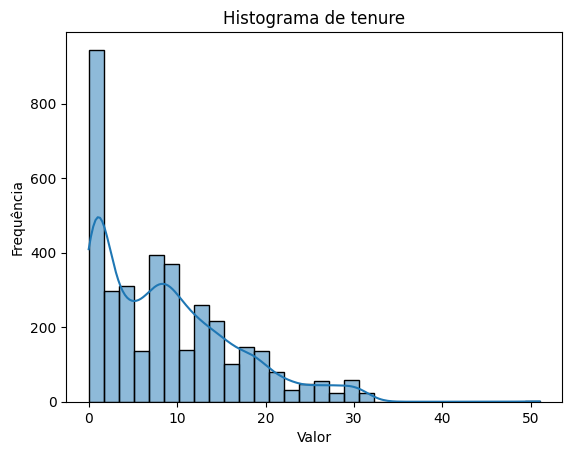

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  3774 non-null   int64  
 1   Tenure                                 3774 non-null   float64
 2   CityTier                               3774 non-null   int64  
 3   WarehouseToHome                        3774 non-null   float64
 4   HourSpendOnApp                         3774 non-null   float64
 5   NumberOfDeviceRegistered               3774 non-null   int64  
 6   SatisfactionScore                      3774 non-null   int64  
 7   NumberOfAddress                        3774 non-null   int64  
 8   Complain                               3774 non-null   int64  
 9   OrderAmountHikeFromlastYear            3774 non-null   float64
 10  CouponUsed                             3774 non-null   float64
 11  OrderCoun

In [288]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tenure'], bins=30, kde=True)
plt.title('Histograma de tenure')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()
print(df.info())

# como temos histogramas não normalizados, podemos usar a mediana, que é uma medida mais robusta, para preencher os dados vazios.

In [289]:
import numpy as np
import random
import tensorflow as tf
import os

# Fixar seed
SEED = 43
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)



from sklearn.model_selection import train_test_split

# vamos agora separar os dados de treino, teste e validação, fazer a mediana dos valores faltantes com os dados de treino e aplicá-los também
# nos dados de teste e validação, para evitar data leakage.

X = df.drop('Churn', axis=1)
y = df['Churn']

# Primeiro, separe os dados de treino (60%) e um conjunto temporário (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=SEED, stratify=y)

# Agora, divida o conjunto temporário em validação (20%) e teste (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp)

print(f"Formato dos dados de treino: {X_train.shape}")
print(f"Formato dos dados de validação: {X_val.shape}")
print(f"Formato dos dados de teste: {X_test.shape}")



Formato dos dados de treino: (2264, 34)
Formato dos dados de validação: (755, 34)
Formato dos dados de teste: (755, 34)


In [290]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Ajuste o scaler com os dados de treino e transforme-os
X_train_scaled = scaler.fit_transform(X_train)

# Transforme os dados de validação e teste com o scaler já ajustado
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [291]:

from sklearn.utils import class_weight
import numpy as np
import tensorflow as tf
from keras import layers

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i : class_weights[i] for i in range(2)}

# Camada inicial
inputs = tf.keras.Input(shape=(X_train_scaled.shape[1],))

# Camadas intermediárias
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.15)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.15)(x)

# Saída
outputs = layers.Dense(1, activation='sigmoid')(x)

model_name = f'Churn_Predictor_NN'
model_nn = tf.keras.Model(inputs=inputs, outputs=outputs, name=model_name)
model_nn.summary()


# TRAINING THE MODEL
# optimizer = tensorflow.keras.optimizers.RMSProp(learning_rate=lr)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['f1_score', tf.keras.metrics.Recall(name='recall')])
history = model_nn.fit(X_train_scaled, 
                     y_train, 
                     batch_size=X.shape[0], 
                     epochs=200, 
                     validation_data=(X_val_scaled, y_val),
                     class_weight=class_weights, 
                     verbose=1) # , callbacks=[es])




Model: "Churn_Predictor_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 34)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - f1_score: 0.2868 - loss: 0.8690 - recall: 0.0132 - val_f1_score: 0.2860 - val_loss: 0.6453 - val_recall: 0.4286
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - f1_score: 0.2868 - loss: 0.6943 - recall: 0.3958 - val_f1_score: 0.2860 - val_loss: 0.7769 - val_recall: 0.9762
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - f1_score: 0.2868 - loss: 0.6744 - recall: 0.9077 - val_f1_score: 0.2860 - val_loss: 0.8355 - val_recall: 1.0000
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - f1_score: 0.2868 - loss: 0.6803 - recall: 0.9710 - val_f1_score: 0.2860 - val_loss: 0.8274 - val_recall: 1.0000
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - f1_score: 0.2868 - loss: 0.6657 - recall: 0.9683 - val_f1_score: 0.2860 - val_loss: 0.7864 - val_recall: 0.9841
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - f1_score: 0.2868 - loss: 0.6463 - recall: 0.9525 - val_f1_score: 0.2860 - val_loss: 0.7314 - val_recall: 0.9206
Epoch 7/200
1/1 

In [292]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Fazendo previsões no conjunto de teste
y_pred_proba_nn = model_nn.predict(X_test_scaled)
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int) # Convertendo probabilidades em classes (0 ou 1). 
# Como a sensibilidade para os clientes propensos ao cancelamento é importante, podemos colocar o limiar um pouco abaixo de 0.5 se preferirmos.

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Relatório de classificação completo
print("\nRelatório de Classificação Inicial - Redes Neurais:")
print(classification_report(y_test, y_pred_nn))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Acurácia: 0.9404
Precisão: 0.8045
Recall: 0.8492

Relatório de Classificação Inicial - Redes Neurais:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       629
           1       0.80      0.85      0.83       126

    accuracy                           0.94       755
   macro avg       0.89      0.90      0.90       755
weighted avg       0.94      0.94      0.94       755



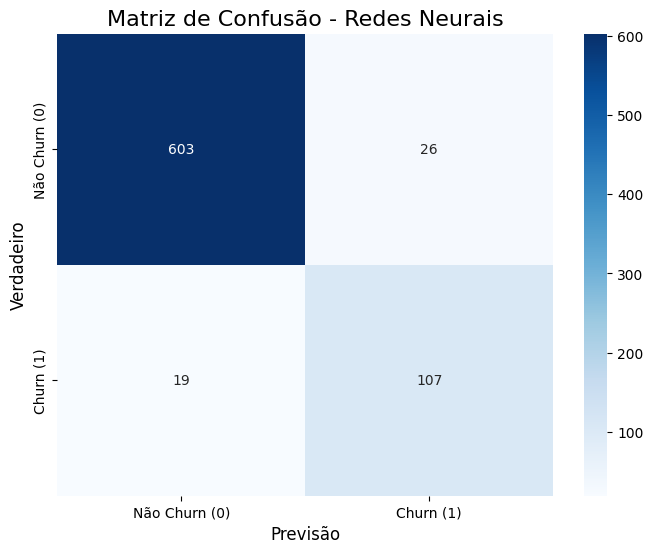

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Calcular a Matriz de Confusão
cm_nn = confusion_matrix(y_test, y_pred_nn)

# 2. Criar o Gráfico (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])

# Adicionar títulos e rótulos para clareza
plt.title('Matriz de Confusão - Redes Neurais', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.show()

In [294]:
# comparar com árvore de decisão

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Hiperparâmetros para testar
min_samples_split_list = [2, 5, 10]
max_depth_list = [None, 5, 10, 20]

# Variáveis para armazenar o melhor modelo e pontuação
melhor_modelo_dt = None
melhor_score_dt = 0
melhores_parametros_dt = {}

# Loop pelos hiperparâmetros
for min_split in min_samples_split_list:
    for max_d in max_depth_list:
        modelo_dt = DecisionTreeClassifier(min_samples_split=min_split, max_depth=max_d, random_state=SEED)
        modelo_dt.fit(X_train_scaled, y_train)

        # Avalia no conjunto de validação, usando o recall como melhor métrica
        y_pred_val_dt = modelo_dt.predict(X_val_scaled)
        score_val_dt = f1_score(y_val, y_pred_val_dt, average='binary')  # ou 'macro' para multiclasse

        # Se for o melhor até agora, armazena
        if score_val_dt > melhor_score_dt:
            melhor_score_dt = score_val_dt
            melhor_modelo_dt = modelo_dt
            melhores_parametros = {
                'min_samples_split': min_split,
                'max_depth': max_d
            }

print("Melhores parâmetros encontrados - Decision Tree:", melhores_parametros)
print("Recall (validação):", melhor_score_dt)

# Inferência nos dados de teste
y_pred_test_dt = melhor_modelo_dt.predict(X_test_scaled)
y_pred_proba_dt = melhor_modelo_dt.predict_proba(X_test_scaled)[:, 1]


Melhores parâmetros encontrados - Decision Tree: {'min_samples_split': 2, 'max_depth': 10}
Recall (validação): 0.7704280155642024


In [295]:
# Avaliação do modelo nos dados de teste
print("Accuracy:", accuracy_score(y_test, y_pred_test_dt))
print("Precision:", precision_score(y_test, y_pred_test_dt, average='binary'))
print("Recall:", recall_score(y_test, y_pred_test_dt, average='binary'))

# Relatório de classificação completo
print("\nRelatório de Classificação Inicial - Redes Neurais:")
print(classification_report(y_test, y_pred_test_dt))

Accuracy: 0.9165562913907285
Precision: 0.7647058823529411
Recall: 0.7222222222222222

Relatório de Classificação Inicial - Redes Neurais:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       629
           1       0.76      0.72      0.74       126

    accuracy                           0.92       755
   macro avg       0.85      0.84      0.85       755
weighted avg       0.91      0.92      0.92       755



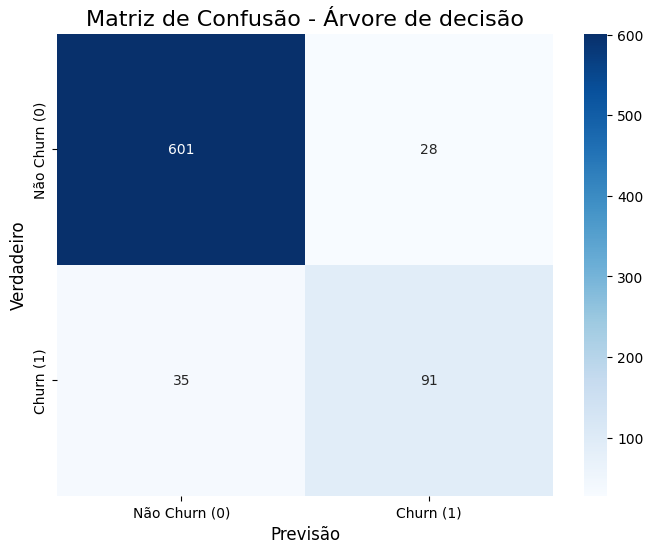

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Calcular a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_test_dt)

# 2. Criar o Gráfico (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])

# Adicionar títulos e rótulos para clareza
plt.title('Matriz de Confusão - Árvore de decisão', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.show()

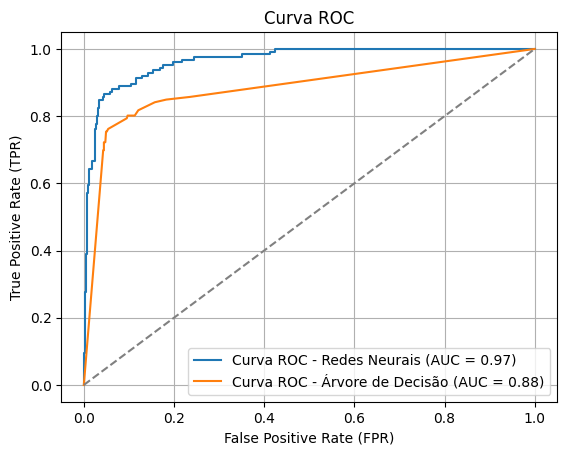

In [297]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular a ROC curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)

# Calcular a área sob a curva (AUC)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plotar a curva
plt.figure()
plt.plot(fpr_nn, tpr_nn, label=f'Curva ROC - Redes Neurais (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Curva ROC - Árvore de Decisão (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha aleatória (baseline)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [298]:
# comparando o recall em vários thresholds:

from sklearn.metrics import recall_score

thresholds = np.linspace(0, 1, 100)
recalls_nn = []
recalls_arvore = []

for t in thresholds:
    y_pred_nn = (y_pred_proba_nn >= t).astype(int)
    y_pred_arvore = (y_pred_proba_dt >= t).astype(int)
    
    recalls_nn.append(recall_score(y_test, y_pred_nn))
    recalls_arvore.append(recall_score(y_test, y_pred_arvore))


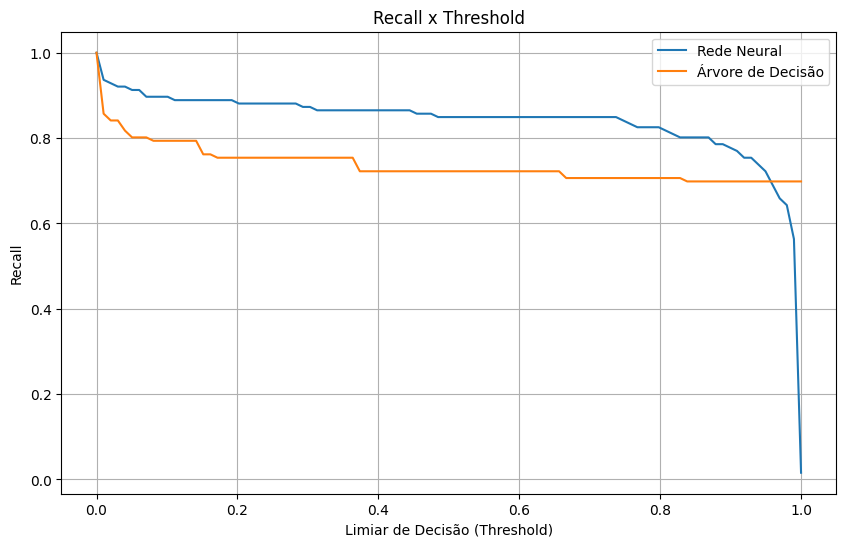

In [299]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls_nn, label='Rede Neural')
plt.plot(thresholds, recalls_arvore, label='Árvore de Decisão')
plt.xlabel('Limiar de Decisão (Threshold)')
plt.ylabel('Recall')
plt.title('Recall x Threshold')
plt.legend()
plt.grid(True)
plt.show()


## Referências

